In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import pandas.io.sql as psql
import math 
import statsmodels.formula.api as smf

In [2]:
connection = sqlite3.connect("housing.db")
c = connection.cursor()
# where is same to query in dataframe, seceen out what you want
# order by name DESC/ASC
c.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name")
# show all of the 
c.fetchall()

[('houses',)]

In [3]:
# select all data from dataset for understanding
houses_df = pd.read_sql("SELECT * FROM houses",connection)
houses_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,2217,909279080,50,RL,NaN,11275,Pave,None,IR1,HLS,...,0,None,None,None,0,3,2007,WD,Normal,220000
1,837,907126050,20,RL,65.0,9757,Pave,None,Reg,Low,...,0,None,None,None,0,10,2009,WD,Normal,143000
2,2397,528144030,60,RL,86.0,11065,Pave,None,IR1,Lvl,...,0,None,None,None,0,10,2006,New,Partial,281000
3,1963,535452060,20,RL,70.0,7000,Pave,None,Reg,Lvl,...,0,None,MnWw,None,0,4,2007,WD,Family,135000
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,...,0,None,None,None,0,1,2010,WD,Abnorml,102776


In [4]:
# isnull()find out if the value is not a number(NaN) and return True is NaN fales otherwise
houses_df.isnull().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       388
Lot Area             0
Street               0
Alley             2192
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        21
Mas Vnr Area        21
Exter Qual           0
Exter Cond           0
Foundation           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1127
Garage Type        124
Garage Yr Blt      126
Garage Finish      126
Garage Cars          1
Garage Area          1
Garage Qual

In [5]:
#select sale price under the normal 
normal_condition = houses_df[houses_df['Sale Condition'] == 'Normal']
normal_condition.dropna()
normal_condition.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,2217,909279080,50,RL,NaN,11275,Pave,None,IR1,HLS,...,0,None,None,None,0,3,2007,WD,Normal,220000
1,837,907126050,20,RL,65.0,9757,Pave,None,Reg,Low,...,0,None,None,None,0,10,2009,WD,Normal,143000
5,1140,531382090,60,RL,65.0,8453,Pave,None,IR1,Lvl,...,0,None,None,None,0,4,2008,WD,Normal,182000
7,1664,527402150,20,RL,NaN,10530,Pave,None,IR1,Lvl,...,0,None,None,None,0,3,2007,WD,Normal,143250
8,2818,908102320,20,RL,134.0,17755,Pave,None,Reg,Lvl,...,0,None,None,None,0,11,2006,WD,Normal,149900


In [6]:
column_names = ['Gr Liv Area','Total Bsmt SF','Year Built','SalePrice']
house_price = normal_condition[column_names]
house_price.dropna()
house_price.head()

,Gr Liv Area,Total Bsmt SF,Year Built,SalePrice
0,1991,854.0,1932,220000
1,990,990.0,1994,143000
5,1609,754.0,1995,182000
7,981,981.0,1971,143250
8,1466,1466.0,1959,149900


In [7]:
# check the bad rows have been removed
house_price.isnull().sum()

Gr Liv Area      0
Total Bsmt SF    0
Year Built       0
SalePrice        0
dtype: int64

In [8]:
house_price.rename(index=str, columns={"Gr Liv Area": "Gr_Liv_Area", "Total Bsmt SF": "Total_Bsmt_SF", "Year Built":"Building_age" }, inplace=True)
house_price.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Gr_Liv_Area,Total_Bsmt_SF,Building_age,SalePrice
0,1991,854.0,1932,220000
1,990,990.0,1994,143000
5,1609,754.0,1995,182000
7,981,981.0,1971,143250
8,1466,1466.0,1959,149900


In [9]:

# Suppose the year is 2010, then update the Year Built by calculating (2010-Year Built)
#according to the hint we can use apply function to calculate the year
house_price["Building_age"] = house_price["Building_age"].apply(lambda x : 2010-x)
house_price.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Gr_Liv_Area,Total_Bsmt_SF,Building_age,SalePrice
0,1991,854.0,78,220000
1,990,990.0,16,143000
5,1609,754.0,15,182000
7,981,981.0,39,143250
8,1466,1466.0,51,149900


In [10]:
# Find the linear correlation between variables
house_price_correlation = house_price.corr()["SalePrice"].abs().sort_values()
print(house_price_correlation)

Building_age     0.520716
Total_Bsmt_SF    0.635165
Gr_Liv_Area      0.740554
SalePrice        1.000000
Name: SalePrice, dtype: float64


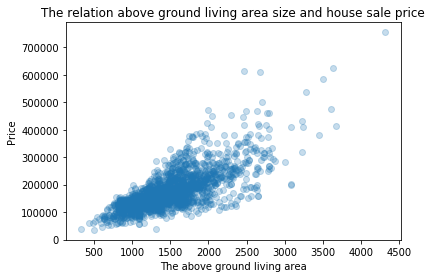

In [11]:
%matplotlib inline
y = house_price['SalePrice']
x = house_price['Gr_Liv_Area']
fig = plt.figure()
plt.scatter(x,y,alpha = 0.25)
plt.xlabel("The above ground living area")
plt.ylabel("Price")
plt.title("The relation above ground living area size and house sale price")
plt.show()

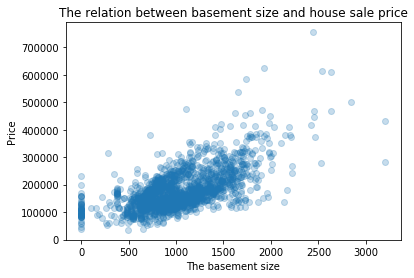

In [12]:
%matplotlib inline
y = house_price['SalePrice']
x = house_price['Total_Bsmt_SF']
fig = plt.figure()
plt.scatter(x,y,alpha = 0.25)
plt.xlabel("The basement size")
plt.ylabel("Price")
plt.title("The relation between basement size and house sale price")
plt.show()

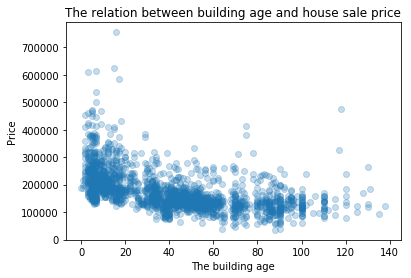

In [13]:
%matplotlib inline
y = house_price['SalePrice']
x = house_price['Building_age']
fig = plt.figure()
plt.scatter(x,y,alpha = 0.25)
plt.xlabel("The building age")
plt.ylabel("Price")
plt.title("The relation between building age and house sale price")
plt.show()

In [14]:
# Q2
column_names = ['Gr Liv Area','Total Bsmt SF','SalePrice']
house_price2 = normal_condition[column_names]
house_price2.dropna()
house_price2.head()

,Gr Liv Area,Total Bsmt SF,SalePrice
0,1991,854.0,220000
1,990,990.0,143000
5,1609,754.0,182000
7,981,981.0,143250
8,1466,1466.0,149900


In [15]:
# 2 a
from sklearn.model_selection import train_test_split
X1 = house_price2[['Gr Liv Area','Total Bsmt SF']]
Y1 = house_price2['SalePrice']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [16]:
# intercept = false
# Step 1: Initialize the model
# This is also the place where you can specify some settings
from sklearn.linear_model import LinearRegression
MODEL1 = LinearRegression(fit_intercept = False)

In [17]:
# Step 2: Fit the model
MODEL1.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [18]:
print('Intercept: ', MODEL1.intercept_)
print('Coefficients: ', MODEL1.coef_)

Intercept:  0.0
Coefficients:  [76.00477469 63.96370839]


In [19]:
# 2 b
X2 = house_price2[['Gr Liv Area','Total Bsmt SF']]
Y2 = house_price2['SalePrice']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=42)
# Step 1: Initialize the model
# This is also the place where you can specify some settings
# intercept = True
MODEL2 = LinearRegression(fit_intercept = True)

In [20]:
# Step 2: Fit the model
MODEL2.fit(X2,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print('Intercept: ', MODEL2.intercept_)
print('Coefficients: ', MODEL2.coef_)

Intercept:  -23483.645387017314
Coefficients:  [85.65486632 71.11741445]


In [22]:
# 2 c
# SHOW performance of MODEL1
# Step 3: Predict using the model
Y1_pred = MODEL1.predict(X1_test)
# Evaluate the model using metrics
from sklearn.metrics import mean_squared_error
MSE_Model1 = mean_squared_error(Y1_test,Y1_pred)# Compare the actual y_test to the prediction
# RMSE
RMSE_Model1 = math.sqrt(MSE_Model1)

from sklearn.metrics import r2_score
R_square1 = r2_score(Y1_test, Y1_pred)
print("Mean Squared Error for MODEL1: {0:.3f}".format(MSE_Model1))
print("R^2 for MODEL1: {0:.3f}".format(R_square1))
print("RMSE for MODEL1: {0:.3f}".format(RMSE_Model1))

Mean Squared Error for MODEL1: 1919623874.730
R^2 for MODEL1: 0.656
RMSE for MODEL1: 43813.512


In [23]:
# SHOW performance of MODEL2
# Step 3: Predict using the model
Y2_pred = MODEL2.predict(X2_test)
# Evaluate the model using metrics
# MSE
MSE_Model2 = mean_squared_error(Y2_test, Y2_pred)# Compare the actual y_test to the prediction
# RMSE
RMSE_Model2 = math.sqrt(MSE_Model2)
                        
from sklearn.metrics import r2_score
R_square2 = r2_score(Y2_test, Y2_pred)
print("Mean Squared Error for MODEL2: {0:.3f}".format(MSE_Model2))
print("R^2 for MODEL2: {0:.3f}".format(R_square2))
print("RMSE for MODEL2: {0:.3f}".format(RMSE_Model2))

Mean Squared Error for MODEL2: 1856417927.868
R^2 for MODEL2: 0.668
RMSE for MODEL2: 43086.169


In [24]:
#the model2 has the smaller MSE than model1. It means that the error is smaller.
#Also, the model2 has the larger R^2 then moedel1, which indicates the linear model with intercept fits the data better.

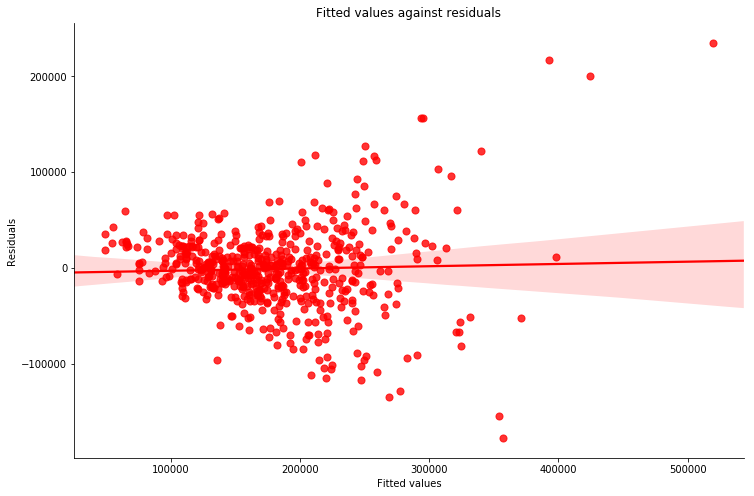

In [25]:
#2 d
#choose MODEL2.residual diagnotics
#MODLE2 has the smaller MSE and lager R^2

import seaborn as sns
residual = Y2_test - Y2_pred
fig, ax= plt.subplots(figsize = (12, 8))
sns.regplot(Y2_pred, residual, color = 'red', scatter_kws={'s' : 50}) 
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
ax.set_title("Fitted values against residuals")
sns.despine()
plt.show()

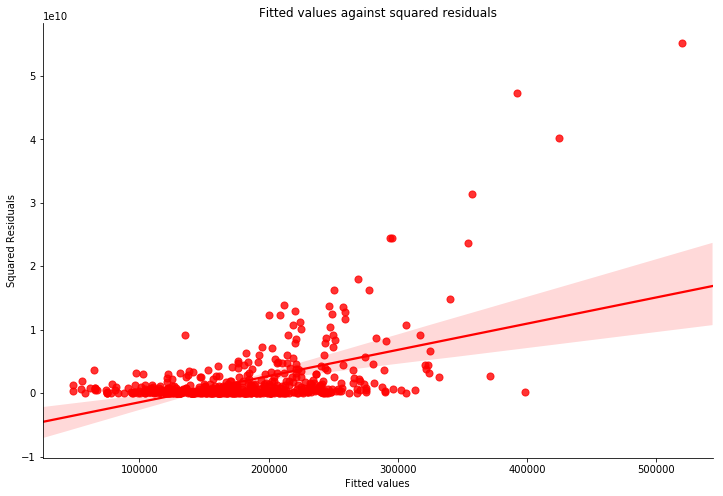

In [26]:
fig, ax= plt.subplots(figsize = (12, 8))
sns.regplot(Y2_pred, residual**2, color = 'red',scatter_kws={'s' : 50}) 
ax.set_ylabel('Squared Residuals')
ax.set_xlabel('Fitted values')
ax.set_title("Fitted values against squared residuals")
sns.despine()
plt.show()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


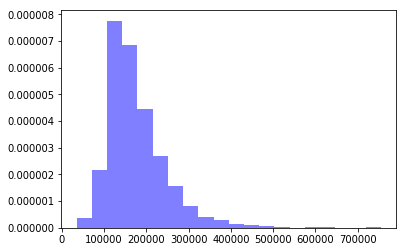

In [30]:
#Q3

n, bins, patches = plt.hist(house_price2['SalePrice'], 20, normed=1, facecolor='blue', alpha=0.5)



In [31]:
house_price3 = normal_condition
house_price3.corr()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.197940,0.010763,-0.004266,0.039903,0.016244,-0.120153,-0.141250,-0.027996,-0.045290,...,-0.015955,0.013639,0.022103,-0.037563,0.018160,0.044204,-0.018664,0.109633,-0.976410,-0.075058
PID,0.197940,1.000000,-0.016475,-0.080849,0.054833,0.128342,-0.334292,-0.100723,-0.227922,-0.130351,...,-0.038176,-0.042587,0.169004,-0.024743,-0.029474,-0.009823,-0.022757,-0.064666,-0.018231,-0.199795
MS SubClass,0.010763,-0.016475,1.000000,-0.445072,-0.210663,-0.086341,0.050340,0.050327,0.018814,-0.082794,...,-0.030801,-0.001325,-0.030319,-0.040471,-0.059941,-0.030602,-0.030953,0.017368,-0.021483,-0.088750
Lot Frontage,-0.004266,-0.080849,-0.445072,1.000000,0.556893,-0.046344,0.083263,0.063387,0.208946,0.180802,...,0.126497,0.144027,-0.007406,0.021814,0.100555,0.097880,0.023933,-0.005181,-0.006333,0.372883
Lot Area,0.039903,0.054833,-0.210663,0.556893,1.000000,-0.015806,0.000728,0.016504,0.094721,0.156647,...,0.189211,0.093211,0.014078,0.023433,0.065253,0.076351,0.056025,0.015680,-0.028035,0.278432
Overall Cond,0.016244,0.128342,-0.086341,-0.046344,-0.015806,1.000000,-0.408378,0.076269,-0.135003,-0.056007,...,0.009305,-0.060655,0.093870,0.062792,0.059894,-0.013770,0.045898,0.043170,0.007679,-0.082958
Year Built,-0.120153,-0.334292,0.050340,0.083263,0.000728,-0.408378,1.000000,0.541688,0.287543,0.289495,...,0.220823,0.181005,-0.378023,0.010410,-0.056178,0.004745,-0.022810,-0.027484,0.060057,0.520716
Year Remod/Add,-0.141250,-0.100723,0.050327,0.063387,0.016504,0.076269,0.541688,1.000000,0.140365,0.134474,...,0.217550,0.233067,-0.209340,0.027773,-0.049842,-0.007206,-0.018217,-0.001914,0.109870,0.496262
Mas Vnr Area,-0.027996,-0.227922,0.018814,0.208946,0.094721,-0.135003,0.287543,0.140365,1.000000,0.241567,...,0.127052,0.127345,-0.108887,-0.000488,0.048339,0.006904,-0.020536,-0.019644,-0.017375,0.486358
BsmtFin SF 1,-0.045290,-0.130351,-0.082794,0.180802,0.156647,-0.056007,0.289495,0.134474,0.241567,1.000000,...,0.217179,0.107432,-0.098740,0.040257,0.089933,0.012934,0.023662,-0.022130,0.030383,0.459089


In [32]:
column_names = ['Gr Liv Area','Year Built','Total Bsmt SF','Garage Area','SalePrice']
house_price_new = house_price3[column_names]
house_price_new.dropna()
house_price_new.head()

,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area,SalePrice
0,1991,1932,854.0,432.0,220000
1,990,1994,990.0,440.0,143000
5,1609,1995,754.0,525.0,182000
7,981,1971,981.0,576.0,143250
8,1466,1959,1466.0,528.0,149900


In [33]:
house_price_new.rename(index=str, columns={"Gr Liv Area": "Gr_Liv_Area", "Total Bsmt SF": "Total_Bsmt_SF", "Year Built":"Building_age","Garage Area":"Garage_Area"}, inplace=True)
house_price_new


/Users/apple/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Gr_Liv_Area,Building_age,Total_Bsmt_SF,Garage_Area,SalePrice
0,1991,1932,854.0,432.0,220000
1,990,1994,990.0,440.0,143000
5,1609,1995,754.0,525.0,182000
7,981,1971,981.0,576.0,143250
8,1466,1959,1466.0,528.0,149900
10,1312,2001,1267.0,471.0,180500
11,1089,1954,1089.0,252.0,125000
12,1978,2003,1978.0,850.0,318000
13,1465,1939,992.0,240.0,131000
14,1674,2000,814.0,663.0,216000


In [34]:
house_price_new["Building_age"] = house_price_new["Building_age"].apply(lambda x : 2010-x)
house_price_new.head()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Gr_Liv_Area,Building_age,Total_Bsmt_SF,Garage_Area,SalePrice
0,1991,78,854.0,432.0,220000
1,990,16,990.0,440.0,143000
5,1609,15,754.0,525.0,182000
7,981,39,981.0,576.0,143250
8,1466,51,1466.0,528.0,149900


In [35]:
#test 1
import statsmodels.formula.api as smf

formula="SalePrice ~ Gr_Liv_Area + Total_Bsmt_SF"
ols1 = smf.ols(formula=formula, data=house_price_new).fit()
print(ols1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2117.
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:03:37   Log-Likelihood:                -23156.
No. Observations:                1928   AIC:                         4.632e+04
Df Residuals:                    1925   BIC:                         4.634e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.348e+04   3198.698     -7.342

In [36]:
#test2 
import statsmodels.formula.api as smf

formula="SalePrice ~ Gr_Liv_Area + Total_Bsmt_SF + Building_age"
ols2 = smf.ols(formula=formula, data=house_price_new).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     2021.
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:03:39   Log-Likelihood:                -22905.
No. Observations:                1928   AIC:                         4.582e+04
Df Residuals:                    1924   BIC:                         4.584e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.708e+04   3515.082      7.703

In [37]:
#test3
import statsmodels.formula.api as smf

formula="SalePrice ~ Gr_Liv_Area + Total_Bsmt_SF + Building_age+ Garage_Area"
ols = smf.ols(formula=formula, data=house_price_new).fit()
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2117.
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:03:41   Log-Likelihood:                -23156.
No. Observations:                1928   AIC:                         4.632e+04
Df Residuals:                    1925   BIC:                         4.634e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.348e+04   3198.698     -7.342

In [38]:
# test4
import statsmodels.formula.api as smf

formula="np.log(SalePrice) ~ np.log(Gr_Liv_Area) + Total_Bsmt_SF + Building_age"
ols4 = smf.ols(formula=formula, data=house_price_new).fit()
print(ols4.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     2357.
Date:                Sat, 13 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:03:43   Log-Likelihood:                 672.63
No. Observations:                1928   AIC:                            -1337.
Df Residuals:                    1924   BIC:                            -1315.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.3129    

In [39]:
column_names_log = ['Gr Liv Area','Year Built','Total Bsmt SF','Garage Area','SalePrice']
house_price_log = house_price3[column_names_log]
house_price_log.dropna()
house_price_log.head()

,Gr Liv Area,Year Built,Total Bsmt SF,Garage Area,SalePrice
0,1991,1932,854.0,432.0,220000
1,990,1994,990.0,440.0,143000
5,1609,1995,754.0,525.0,182000
7,981,1971,981.0,576.0,143250
8,1466,1959,1466.0,528.0,149900


In [40]:
house_price_log.rename(index=str, columns={"Gr Liv Area": "log_Gr_Liv_Area", "Total Bsmt SF": "Total_Bsmt_SF", "Year Built":"Building_age","Garage Area":"Garage_Area","SalePrice":"log_SalePrice"}, inplace=True)
house_price_log.head()

,log_Gr_Liv_Area,Building_age,Total_Bsmt_SF,Garage_Area,log_SalePrice
0,1991,1932,854.0,432.0,220000
1,990,1994,990.0,440.0,143000
5,1609,1995,754.0,525.0,182000
7,981,1971,981.0,576.0,143250
8,1466,1959,1466.0,528.0,149900


In [41]:
house_price_log["Building_age"] = house_price_log["Building_age"].apply(lambda x : 2010-x)
house_price_log["log_Gr_Liv_Area"] = house_price_log["log_Gr_Liv_Area"].apply(lambda x : np.log(x))
house_price_log["log_SalePrice"] = house_price_log["log_SalePrice"].apply(lambda x : np.log(x))
house_price_log

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,log_Gr_Liv_Area,Building_age,Total_Bsmt_SF,Garage_Area,log_SalePrice
0,7.596392,78,854.0,432.0,12.301383
1,6.897705,16,990.0,440.0,11.870600
5,7.383368,15,754.0,525.0,12.111762
7,6.888572,39,981.0,576.0,11.872347
8,7.290293,51,1466.0,528.0,11.917724
10,7.179308,9,1267.0,471.0,12.103486
11,6.993015,56,1089.0,252.0,11.736069
12,7.589842,7,1978.0,850.0,12.669807
13,7.289611,71,992.0,240.0,11.782953
14,7.422971,10,814.0,663.0,12.283034


In [42]:
# performance of log model
from sklearn.model_selection import train_test_split
X_log = house_price_log[['log_Gr_Liv_Area','Total_Bsmt_SF','Building_age' ]]
Y_log = house_price_log['log_SalePrice']
X_log_train, X_log_test, Y_log_train, Y_log_test = train_test_split(X_log, Y_log, test_size=0.3, random_state=42)

In [43]:
# intercept = false
# Step 1: Initialize the model
# This is also the place where you can specify some settings

log_model = LinearRegression(fit_intercept = True)

In [44]:
# Step 2: Fit the model
log_model.fit(X_log,Y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
print('Intercept: ', log_model.intercept_)
print('Coefficients: ', log_model.coef_)

Intercept:  7.312892836500354
Coefficients:  [ 6.35236809e-01  2.56305305e-04 -4.24982084e-03]


In [46]:
# SHOW performance of new moddel
# Step 3: Predict using the model
Y_log_pred = log_model.predict(X_log_test)
# Evaluate the model using metrics
# MSE
MSE_log_Model = mean_squared_error(Y_log_test, Y_log_pred)# Compare the actual y_test to the prediction
# RMSE
RMSE_log_Model = math.sqrt(MSE_log_Model)
                        
from sklearn.metrics import r2_score
R_square_log = r2_score(Y_log_test, Y_log_pred)
print("Mean Squared Error for MODEL2: {0:.3f}".format(MSE_log_Model))
print("R^2 for log_model: {0:.3f}".format(R_square_log))
print("RMSE for log_model: {0:.3f}".format(RMSE_log_Model))

Mean Squared Error for MODEL2: 0.030
R^2 for log_model: 0.779
RMSE for log_model: 0.173


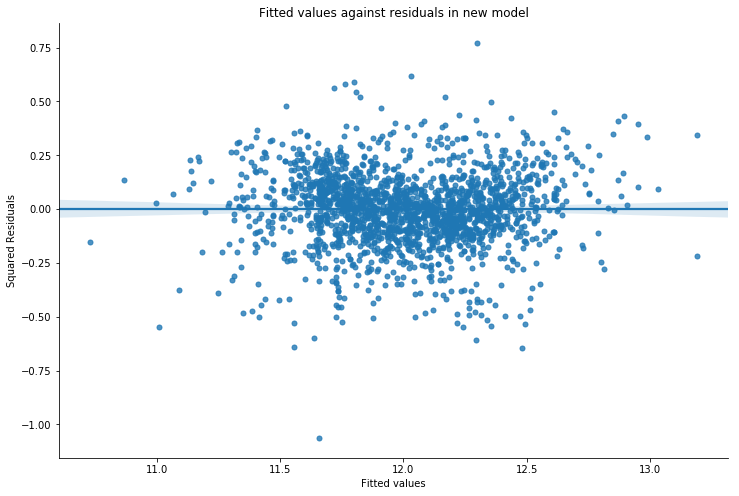

In [47]:
fig, ax= plt.subplots(figsize = (12, 8))
sns.regplot(ols4.fittedvalues, ols4.resid, scatter_kws={'s' : 25}) 
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Squared Residuals')
ax.set_xlabel('Fitted values')
ax.set_title("Fitted values against residuals in new model")
sns.despine()
plt.show()

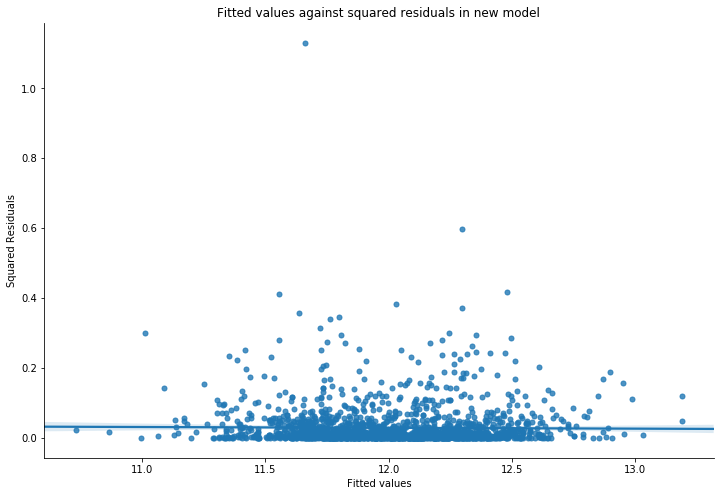

In [48]:
fig, ax= plt.subplots(figsize = (12, 8))
sns.regplot(ols4.fittedvalues, ols4.resid**2, scatter_kws={'s' : 25}) 
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Squared Residuals')
ax.set_xlabel('Fitted values')
ax.set_title("Fitted values against squared residuals in new model")
sns.despine()
plt.show()